In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# --- IMPORTS ---
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

2025-06-18 08:32:35.750908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750235556.182359      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750235556.286890      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# --- CONFIG ---
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
EPOCHS = 5  # Use more (e.g., 15–20) for better accuracy

In [3]:
# --- DATASET PATH ---
base_dir = '/kaggle/input/food41/images'  # You can explore this in "Data" section

In [4]:
# --- DATA GENERATORS ---
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [6]:
# --- MODEL ---
base_model = MobileNetV2(include_top=False, input_shape=(*IMG_SIZE, 3), weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(train_gen.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# --- TRAINING ---
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1750235949.837525     113 service.cc:148] XLA service 0x7ba2300030a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750235949.839136     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750235949.839161     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750235950.831767     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2525 ━━━━━━━━━━━━━━━━━━━━ 9:42:30 14s/step - accuracy: 0.0000e+00 - loss: 5.0956

I0000 00:00:1750235955.899384     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1071s 419ms/step - accuracy: 0.3944 - loss: 2.5472 - val_accuracy: 0.5387 - val_loss: 1.8538
Epoch 2/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 438s 173ms/step - accuracy: 0.5878 - loss: 1.6097 - val_accuracy: 0.5437 - val_loss: 1.8739
Epoch 3/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 430s 170ms/step - accuracy: 0.6269 - loss: 1.4296 - val_accuracy: 0.5483 - val_loss: 1.8531
Epoch 4/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 446s 177ms/step - accuracy: 0.6496 - loss: 1.3226 - val_accuracy: 0.5556 - val_loss: 1.8577
Epoch 5/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 437s 173ms/step - accuracy: 0.6693 - loss: 1.2355 - val_accuracy: 0.5455 - val_loss: 1.9161


In [8]:
# --- SAVE MODEL ---
model.save('food_model.h5')

632/632 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step
                precision    recall  f1-score       support
apple_pie        0.010417  0.005000  0.006757    200.000000
baby_back_ribs   0.007194  0.005000  0.005900    200.000000
baklava          0.011494  0.020000  0.014599    200.000000
beef_carpaccio   0.016598  0.020000  0.018141    200.000000
beef_tartare     0.006494  0.005000  0.005650    200.000000
...                   ...       ...       ...           ...
tuna_tartare     0.009524  0.005000  0.006557    200.000000
waffles          0.010309  0.010000  0.010152    200.000000
accuracy         0.010743  0.010743  0.010743      0.010743
macro avg        0.010360  0.010743  0.010288  20200.000000
weighted avg     0.010360  0.010743  0.010288  20200.000000

[104 rows x 4 columns]


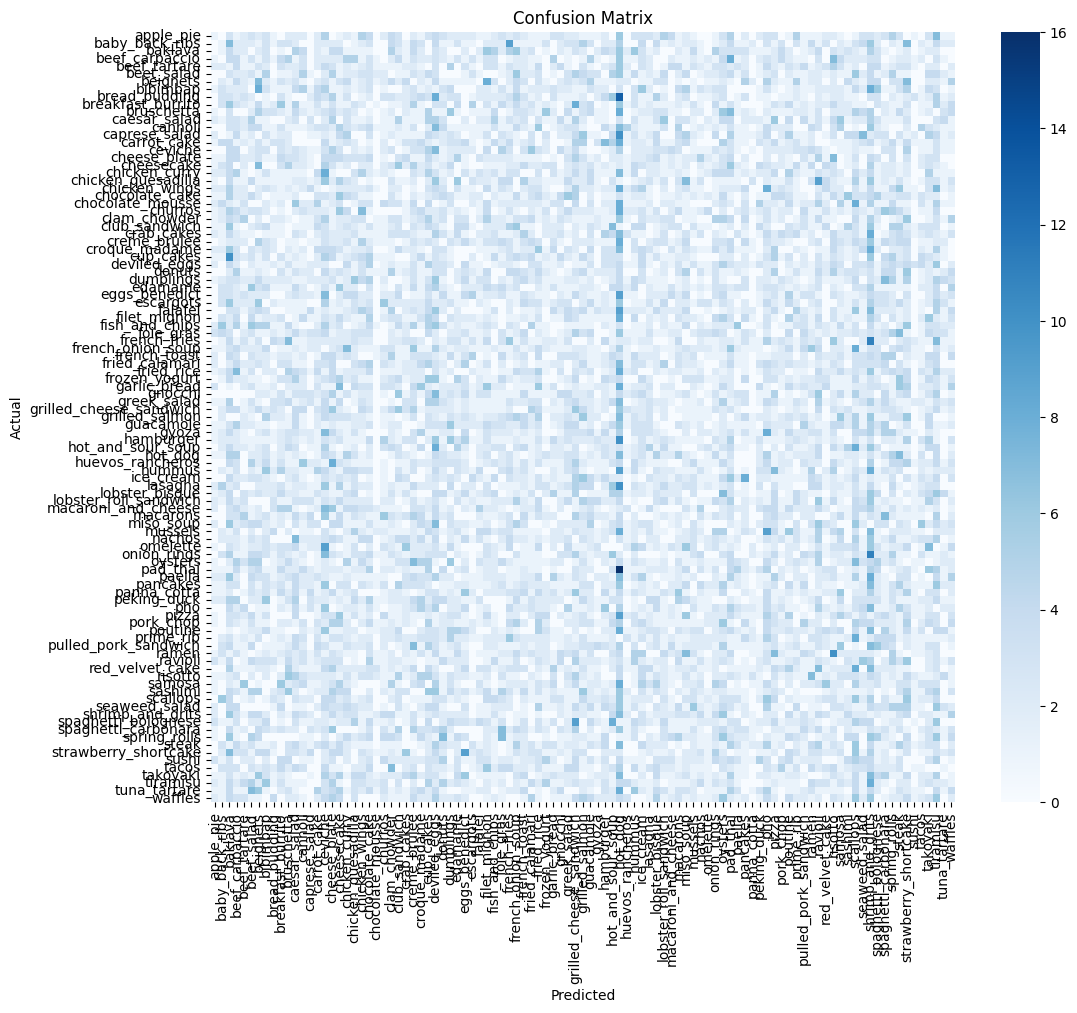

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- Predict on Validation Data ---
val_gen.reset()
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_gen.classes

# --- Labels ---
labels = list(val_gen.class_indices.keys())

# --- Classification Report ---
report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df[['precision', 'recall', 'f1-score', 'support']])

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, cmap='Blues', annot=False, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("CM.png")
plt.show()